<a href="https://colab.research.google.com/github/nit-1418/Deep_learning/blob/main/RNN_in_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

While Recurrent Neural Networks (RNNs) excel at processing sequential data like language, they can be adapted for tasks like classifying the MNIST dataset of handwritten digits. This involves treating each row of pixels as a sequence fed into the RNN, allowing it to capture contextual information. However, simpler and more efficient architectures like Convolutional Neural Networks (CNNs) are generally preferred for MNIST due to their specialization in handling image data.

In [ ]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, SimpleRNN
from keras.utils import to_categorical, plot_model
from keras.datasets import mnist

In [ ]:
# load mnist dataset
(x_train,  y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# compute the number of labels
num_labels = len(np.unique(y_train))
num_labels

10

In [ ]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
# resize and normilaze
image_size = x_train.shape[1]
x_train = np.reshape(x_train, [-1, image_size, image_size])
x_test = np.reshape(x_test, [-1, image_size, image_size])
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [ ]:
# network parameters
input_shape = (image_size, image_size)
batch_size = 128
units = 256
dropout = 0.2

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 256)               72960     
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
 activation_1 (Activation)   (None, 10)                0         
                                                                 
Total params: 75530 (295.04 KB)
Trainable params: 75530 (295.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


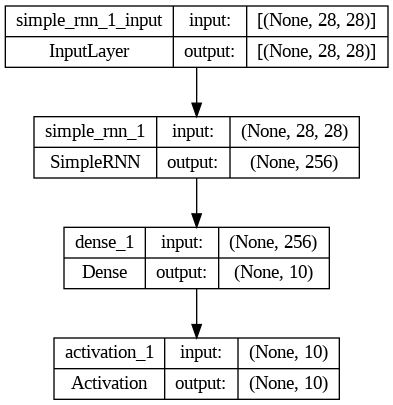

In [ ]:
# model is RNN with 256 units, input is 28-dim vector 28 timestamps
model = Sequential()
model.add(SimpleRNN(units = units,
                    dropout = dropout,
                    input_shape = input_shape))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()
plot_model(model, to_file='rnn-mnist.png', show_shapes=True)


In [ ]:
# loss function for one-hot vector
# use of sgd optimizer
# accuracy is good metric for classification tasks
model.compile(loss = 'categorical_crossentropy',
               optimizer = 'sgd',
               metrics = ['accuracy'])

In [ ]:
# train the network
model.fit(x_train, y_train, epochs = 20, batch_size = batch_size)

Epoch 1/20
469/469 [==============================] - 29s 58ms/step - loss: 0.7692 - accuracy: 0.7769
Epoch 2/20
469/469 [==============================] - 39s 84ms/step - loss: 0.3378 - accuracy: 0.9014
Epoch 3/20
469/469 [==============================] - 33s 71ms/step - loss: 0.2516 - accuracy: 0.9247
Epoch 4/20
469/469 [==============================] - 26s 56ms/step - loss: 0.2049 - accuracy: 0.9400
Epoch 5/20
469/469 [==============================] - 21s 46ms/step - loss: 0.1835 - accuracy: 0.9451
Epoch 6/20
469/469 [==============================] - 23s 49ms/step - loss: 0.1580 - accuracy: 0.9537
Epoch 7/20
469/469 [==============================] - 23s 48ms/step - loss: 0.1413 - accuracy: 0.9579
Epoch 8/20
469/469 [==============================] - 23s 48ms/step - loss: 0.1307 - accuracy: 0.9611
Epoch 9/20
469/469 [==============================] - 23s 48ms/step - loss: 0.1219 - accuracy: 0.9638
Epoch 10/20
469/469 [==============================] - 22s 46ms/step - loss: 0.112

In [ ]:
_, acc = model.evaluate(x_test, y_test, batch_size = batch_size, verbose = 0)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))


Test accuracy: 98.0%
